# Predicción de accidentes cerebrovasculares

### Procesamiento de la base de datos

Librerías utilizadas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importación de la base de datos

In [2]:
df=pd.read_csv('stroke.csv',index_col='id')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Yes
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Yes
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,No
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,No


 Vemos el número de NA de las variables

In [3]:
df.isna().sum().sort_values() 

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
bmi                  201
dtype: int64

La variable bmi tiene 201 observacions con NA por lo que procedemos a eliminar estas filas

In [4]:
df2=df.dropna() 
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Yes
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Yes
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,No
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,No


In [5]:
df2.groupby('stroke').count()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,
No,4700,4700,4700,4700,4700,4700,4700,4700,4700,4700
Yes,209,209,209,209,209,209,209,209,209,209


En la base de datos solo hay 209 casos que sufren accidentes cerebrovasculares representando el 4.26% de la muestra

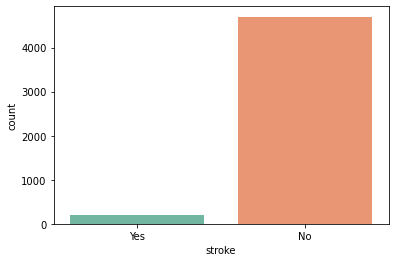

In [6]:
sns.countplot(x='stroke', data=df2,palette="Set2");

Obtenemos la información de las variables para ver cuales se van a clasificar

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 589.3+ KB


Las variables que vamos a codificar son: gender, ever_married,work_type,Residence_type, smoking_status y stroke

Etiquetas de las variables a codificar:

In [8]:
df2['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [9]:
df2['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df2['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [11]:
df2['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
df2['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [13]:
df2['stroke'].unique()

array(['Yes', 'No'], dtype=object)

Codificación de las variables no númericas

In [14]:
Var_cat=[]  
for column in df2.columns:  
    if df2[column].dtype==object:
        Var_cat.append(column)  
       
df2['stroke']=df2.stroke.astype('category').cat.codes 


C:\Users\Sam\AppData\Local\Temp/ipykernel_14600/3231182837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stroke']=df2.stroke.astype('category').cat.codes


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label=LabelEncoder()
for column in Var_cat:
    df2[column]=label.fit_transform(df2[column])
    
df2

C:\Users\Sam\AppData\Local\Temp/ipykernel_14600/2860486221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[column]=label.fit_transform(df2[column])


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0


Aquí vemos como codificó las variables

In [17]:
df2['gender'].unique()

array([1, 0, 2])

In [18]:
df2['ever_married'].unique()

array([1, 0])

In [19]:
df2['work_type'].unique()

array([2, 3, 0, 4, 1])

In [20]:
df2['Residence_type'].unique()

array([1, 0])

In [21]:
df2['smoking_status'].unique()

array([1, 2, 3, 0])

In [22]:
df2['stroke'].unique()

array([1, 0], dtype=int64)

Variable dependiente

In [23]:
y=df2.stroke 
y

id
9046     1
31112    1
60182    1
1665     1
56669    1
        ..
14180    0
44873    0
19723    0
37544    0
44679    0
Name: stroke, Length: 4909, dtype: int64

Variables independientes

In [24]:
x=df2.drop('stroke', axis=1)
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
9046,1,67.0,0,1,1,2,1,228.69,36.6,1
31112,1,80.0,0,1,1,2,0,105.92,32.5,2
60182,0,49.0,0,0,1,2,1,171.23,34.4,3
1665,0,79.0,1,0,1,3,0,174.12,24.0,2
56669,1,81.0,0,0,1,2,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
14180,0,13.0,0,0,0,4,0,103.08,18.6,0
44873,0,81.0,0,0,1,3,1,125.20,40.0,2
19723,0,35.0,0,0,1,3,0,82.99,30.6,2


### Datos de entrenamiento y de prueba

In [25]:
from sklearn.model_selection import train_test_split

Datos de entrenamiento:x_train,y_train (80%)
    
Datos de prueba: x_test,y_test (20%)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)

Número de observaciones en los datos de entrenamiento y de prueba

In [27]:
datos_train=len(y_train)
datos_test=len(y_test)
print(datos_train)
print(datos_test)

3927
982


In [28]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
61684,0,38.0,0,0,1,2,1,151.26,20.6,2
36922,1,56.0,0,0,1,2,0,62.68,18.4,2
17006,1,19.0,0,0,0,2,0,119.04,35.9,0
64661,0,81.0,0,0,0,3,1,57.42,33.7,2
39823,0,41.0,0,0,1,0,0,229.86,35.2,3
...,...,...,...,...,...,...,...,...,...,...
25674,1,40.0,0,0,1,2,1,104.64,24.9,0
33976,1,55.0,0,0,1,2,1,68.79,27.0,2
40889,1,33.0,0,0,0,2,0,77.42,26.1,0


In [29]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
641,1,52.0,0,0,1,0,0,87.26,40.1,3
57777,0,59.0,0,0,1,3,1,90.06,28.9,3
47691,1,16.0,0,0,0,2,0,97.23,30.6,2
45048,0,21.0,0,0,0,2,1,134.45,29.1,2
53271,1,36.0,0,0,1,2,0,74.63,31.6,1
...,...,...,...,...,...,...,...,...,...,...
43773,1,8.0,0,0,0,4,1,61.07,19.1,0
63915,0,39.0,0,0,1,2,1,87.39,57.9,2
39017,0,72.0,0,0,1,0,0,118.22,21.9,1


### Árbol de decisión

In [30]:
from sklearn import tree 

Ver que profundidad quedaría mejor en el árbol en un rango del 1 al 10

In [31]:
max_depth_range = list(range(1, 10)) 
accuracy = []
for depth in max_depth_range:
    
    arbol=tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    arbol.fit(x_train,y_train)    
    score = arbol.score(x_test, y_test)
    accuracy.append(score)

In [32]:
arbol.get_depth() 

9

Profundidad de 9

In [33]:
arbol=tree.DecisionTreeClassifier(criterion='entropy',max_depth=9) 
arbol.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

Gráfica del árbol de decisión

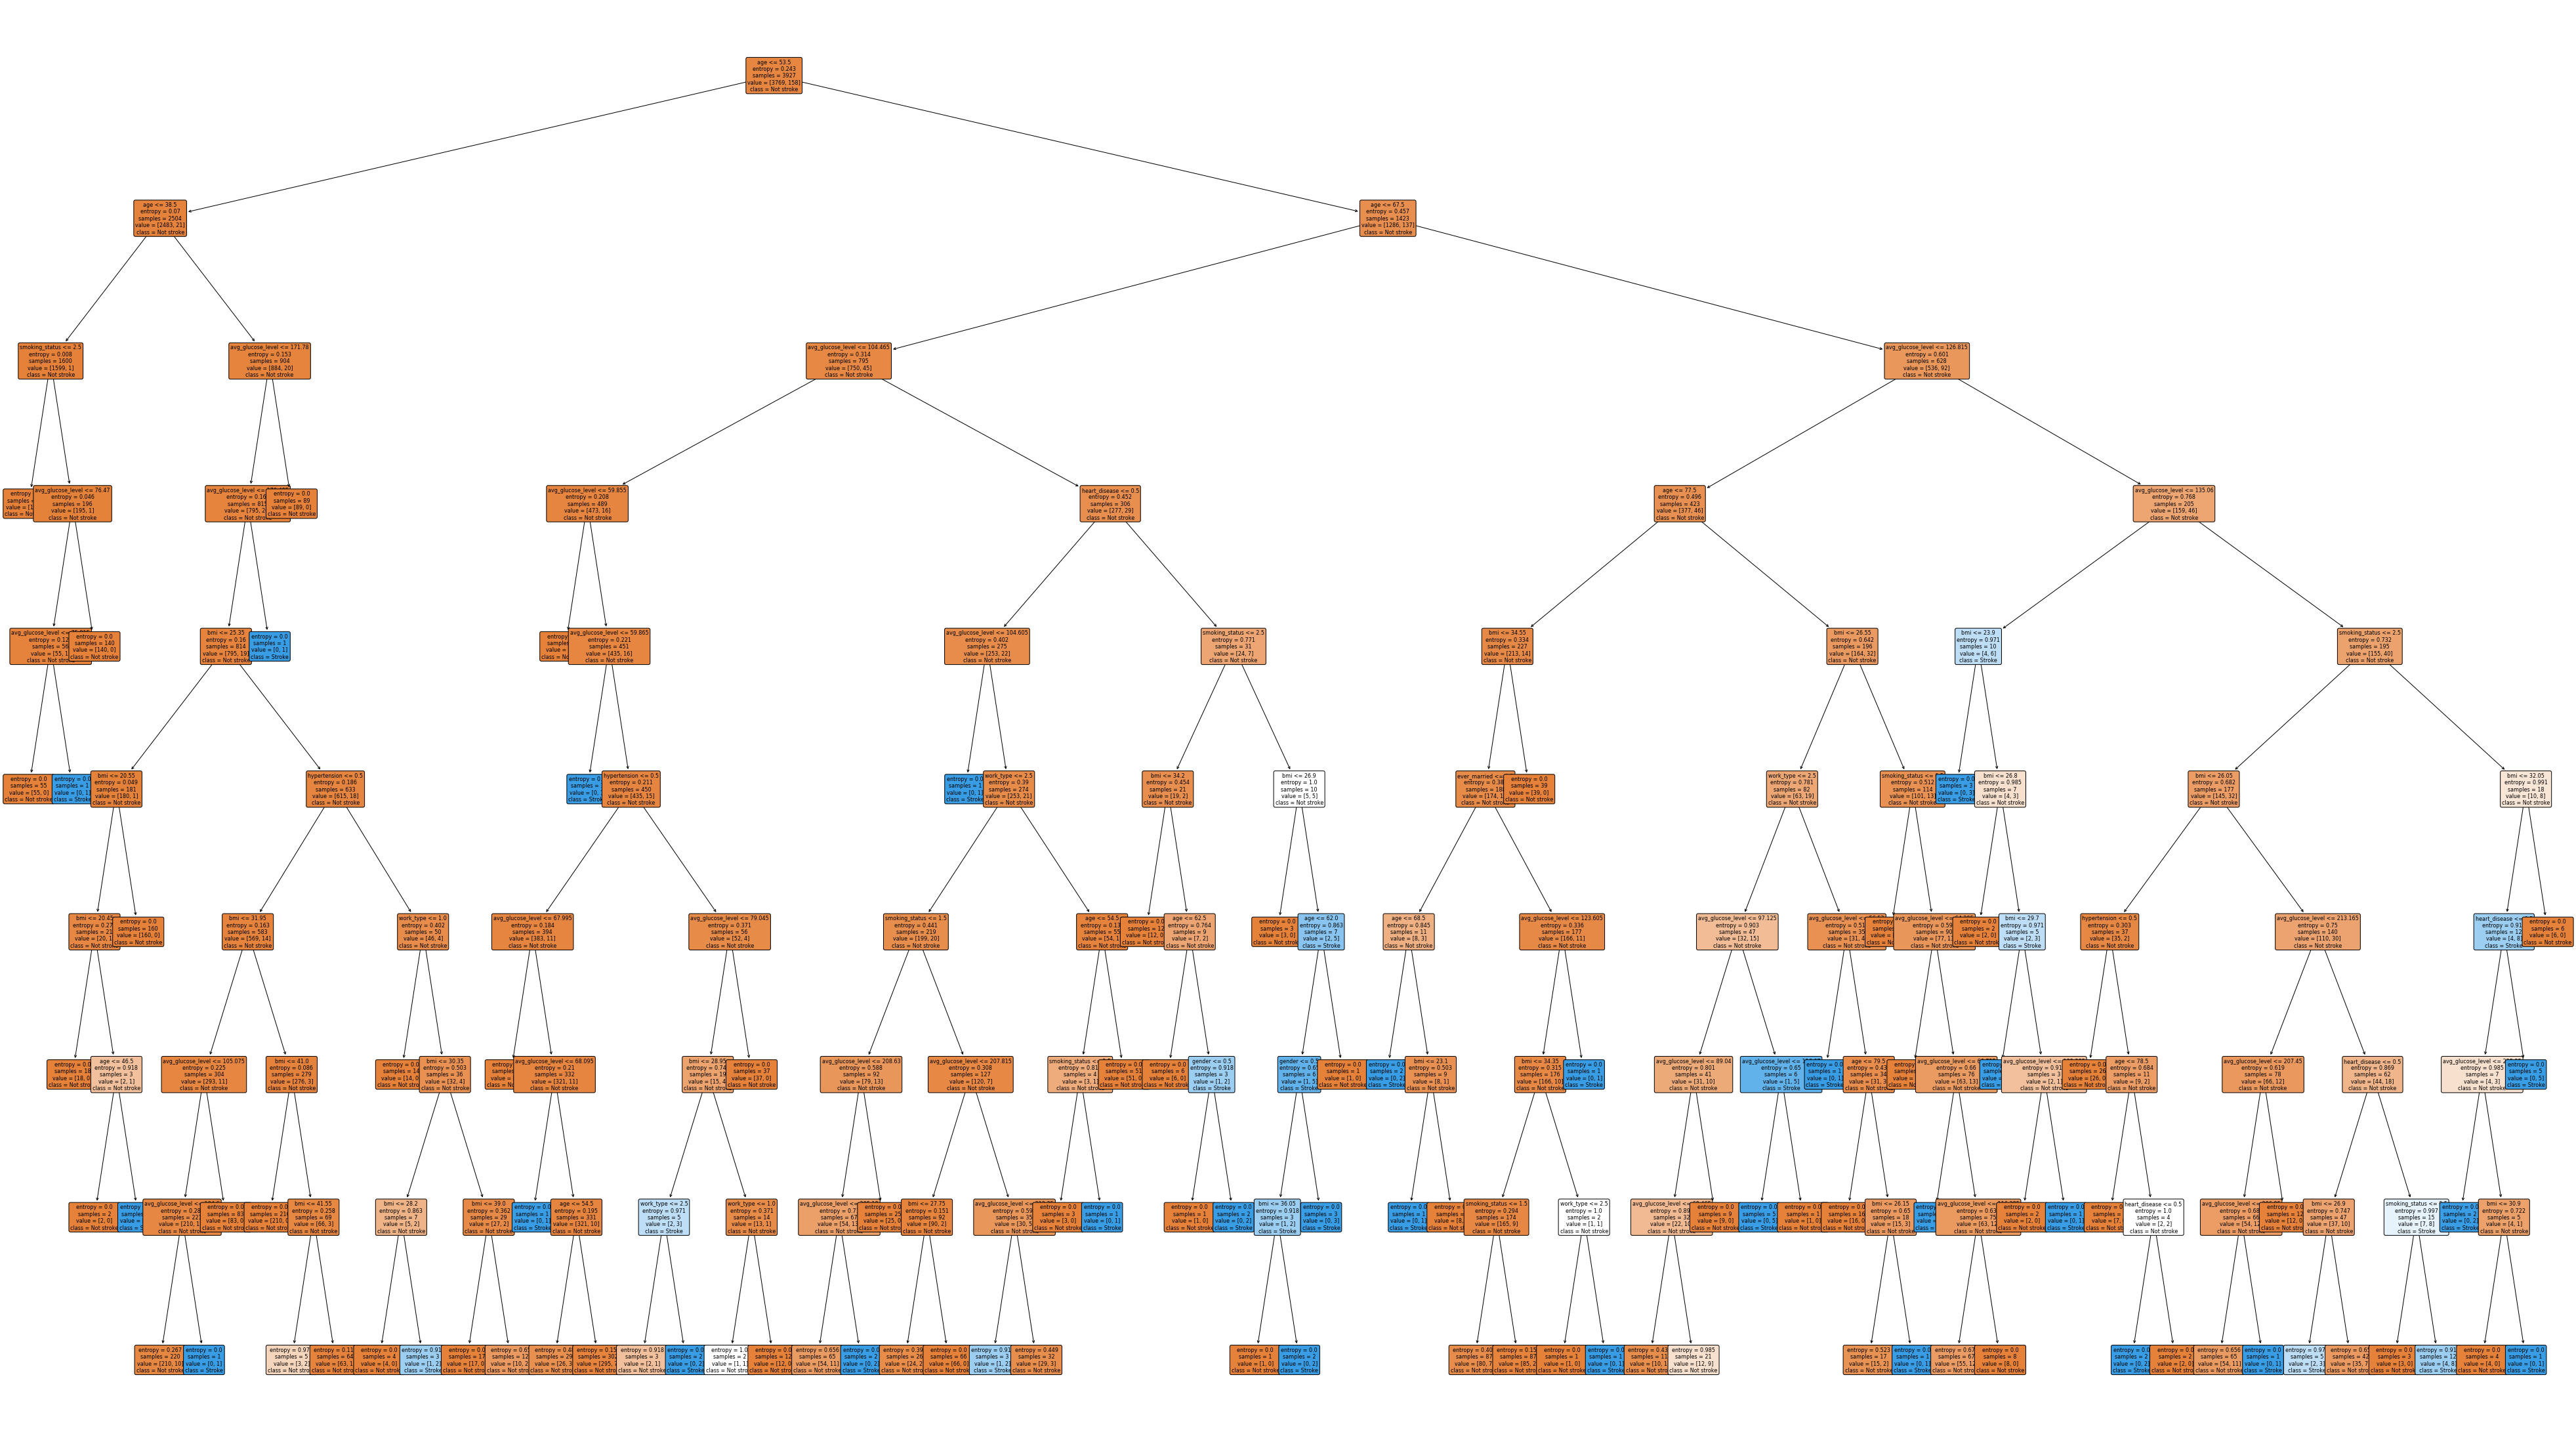

In [38]:
plt.figure(figsize=(70,40))
grafica_arbol=tree.plot_tree(arbol,filled=True,fontsize=8, rounded=True,class_names=['Not stroke','Stroke'],feature_names=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'])
plt.show()

#### Métricas para los datos de entrenamiento

In [655]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

Predicción

In [656]:
pred_train=arbol.predict(x_train)

Matriz de confusión

In [657]:
matriz_conf1=confusion_matrix(y_train,pred_train)
matriz_conf1

array([[3761,    8],
       [  94,   64]], dtype=int64)

Exactitud

In [658]:
accuracy_score(y_train,pred_train)

0.974025974025974

Precisión (Valor predictivo positivo)

In [659]:
precision_score(y_train,pred_train)

0.8888888888888888

Valor predictivo negativo

In [664]:
matriz_conf1[0,0]/(matriz_conf1[0,0]+matriz_conf1[1,0])

0.9756160830090791

Sensibilidad (Tasa de positividad real)

In [661]:
recall_score(y_train,pred_train)

0.4050632911392405

Especificidad (Tasa de negatividad real)

In [662]:
matriz_conf1[0,0]/(matriz_conf1[0,0]+matriz_conf1[0,1])

0.9978774210665959

Puntuación F1

In [666]:
f1_score(y_train,pred_train)

0.5565217391304348

#### Métricas para los datos de prueba

Prueba

In [670]:
pred_test=arbol.predict(x_test)

Matriz de confusión

In [671]:
matriz_conf2=confusion_matrix(y_test,pred_test)
matriz_conf2

array([[914,  17],
       [ 47,   4]], dtype=int64)

Exactitud

In [672]:
accuracy_score(y_test,pred_test)

0.9348268839103869

Precisión (Valor predictivo positivo)

In [673]:
precision_score(y_test,pred_test)

0.19047619047619047

Valor predictivo negativo

In [674]:
matriz_conf2[0,0]/(matriz_conf2[0,0]+matriz_conf2[1,0])

0.951092611862643

Sensibilidad (Tasa de positividad real)

In [675]:
recall_score(y_test,pred_test)

0.0784313725490196

Especificidad (Tasa de negatividad real)

In [676]:
matriz_conf2[0,0]/(matriz_conf2[0,0]+matriz_conf2[0,1])

0.9817400644468314

Puntuación F1

In [677]:
f1_score(y_test,pred_test)

0.1111111111111111

#### Importancia de las variables

In [694]:
arbol.feature_importances_

array([0.00218956, 0.40788328, 0.01533249, 0.03029323, 0.00598952,
       0.02700677, 0.01053395, 0.2505205 , 0.19273994, 0.05751075])

In [695]:
Variables=pd.DataFrame({'Variables':x.columns,'Importancia':arbol.feature_importances_})
Variables

,Variables,Importancia
0,gender,0.002190
1,age,0.407883
2,hypertension,0.015332
3,heart_disease,0.030293
4,ever_married,0.005990
5,work_type,0.027007
6,Residence_type,0.010534
7,avg_glucose_level,0.250521
8,bmi,0.192740
9,smoking_status,0.057511


Ordenamos las variables de menor a mayor importancia

In [696]:
Variables.sort_values('Importancia',ascending=False)

,Variables,Importancia
1,age,0.407883
7,avg_glucose_level,0.250521
8,bmi,0.192740
9,smoking_status,0.057511
3,heart_disease,0.030293
5,work_type,0.027007
2,hypertension,0.015332
6,Residence_type,0.010534
4,ever_married,0.005990
0,gender,0.002190


In [697]:
arbol.feature_names=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']

Gráfica de las importancias de las variables

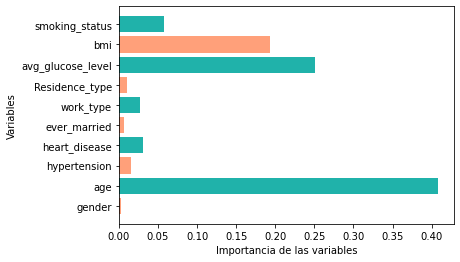

In [698]:
caract=x_train.shape[1]
plt.barh(range(caract),arbol.feature_importances_,color=["lightsalmon","lightseagreen"])
plt.yticks(np.arange(caract),arbol.feature_names)
plt.xlabel('Importancia de las variables')
plt.ylabel('Variables')
plt.show()

#### Curva ROC

In [526]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as métricas
from sklearn.metrics import roc_auc_score

Instalamos el modelo

In [527]:
log_regression = LogisticRegression ()

In [528]:
log_regression.fit(x_train, y_train)

C:\Users\emanuel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [529]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Predecimos las probabilidades
lr_probs = log_regression.predict_proba(x_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]


Calculamos el AUC

In [530]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.866


Calculamos las curvas ROC

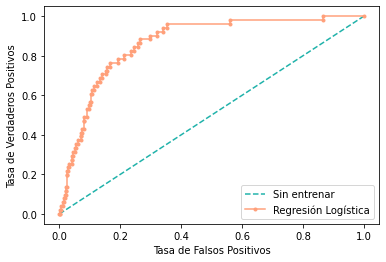

In [531]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, color='lightseagreen', linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', color='lightsalmon', label='Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()